# 2 주성분 분석(PCA, Principal Component Analysis)

* PCA는 데이터의 분산(variance)을 최대로 하는 축을 찾는 것을 반복하여, 고차원 공간의 표본들을 저차원 공간으로 변환하는 기법




![대체 텍스트](http://i.imgur.com/jWJ2nUs.png)

## 2.1 차원 축소의 예

변수 갯수를 차원이라고 생각할 수 있음

In [2]:
국어 = 80
영어 = 60
수학 = 90
과학 = 70

평균 = (국어 + 영어 + 수학 + 과학)/4
평균

75.0

In [4]:
몸무게 = 71
키 = 177


BMI = 몸무게 / (키 * 키)
BMI

0.002266270867247598

## 2.2 PCA 예제 

### 1) 예제 데이터

In [5]:
import pandas as pd
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


### 2) vector 추출

In [7]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [8]:
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [10]:
# Y is labels
Y = df['body_shape']
Y.head()

0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
Name: body_shape, dtype: object

### 3) feature vector 표준화

In [11]:
# 생각보다 할 일이 없어, 구현하는게 아니라 이미 다 해줌

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [12]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [13]:
print(x_std.mean(), x_std.std())

3.552713678800501e-17 1.0


In [14]:
x_std.T

array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

In [16]:
import numpy as np # 넘파이에서는 행을 feature로 받기 때문에..
features = x_std.T
covariance_matrix = np.cov(features)

covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [17]:
x_std.T.dot(x_std)/len()

array([[10.        ,  7.95417455,  6.91041467,  8.04388957, -8.38618274],
       [ 7.95417455, 10.        ,  4.44261658,  7.37711114, -6.45497224],
       [ 6.91041467,  4.44261658, 10.        ,  3.60510439, -6.88247202],
       [ 8.04388957,  7.37711114,  3.60510439, 10.        , -5.71428571],
       [-8.38618274, -6.45497224, -6.88247202, -5.71428571, 10.        ]])

### 5) 고유 벡터(Eigen Vectors)와 고유값(Eigen Values) 산출

In [20]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix) # 알아서 해줌
print('eigen values : ', eig_values)
print('eigen vectors : ', eig_vecs)

eigen values :  [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eigen vectors :  [[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [21]:
# 첫번재 벡터가 얼마나 많이 데이터를 포함할까?

eig_vals[0]/sum(eig_vals) # 약 73%센트 정도 차치함..

0.7318321731427544

### 6) 고유벡터(Eigen Vector)를 기준으로 데이터를 투영

In [22]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [24]:
result = pd.DataFrame(projected_X, columns = ['PC1'])
result['y-axis'] = 0.0  # 1차원을 표현을 위한 억지 축
result['label'] = Y
result

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


In [26]:
# 이제 그래프화 할거야
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

Text(0.5, 1, 'PCA result')

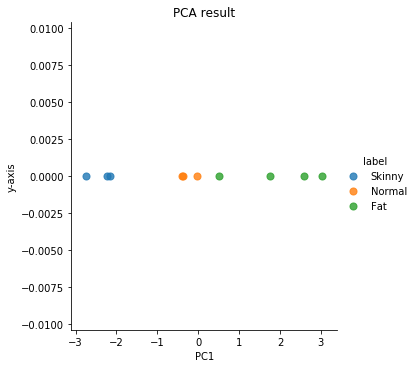

In [30]:
sns.lmplot('PC1', 'y-axis', data = result, fit_reg = False,
          scatter_kws = {"s":50},
          hue = "label")
plt.title('PCA result') 

## 2.3 scikit-learn 활용 PCA

In [33]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

Text(0.5, 1, 'PCA result')

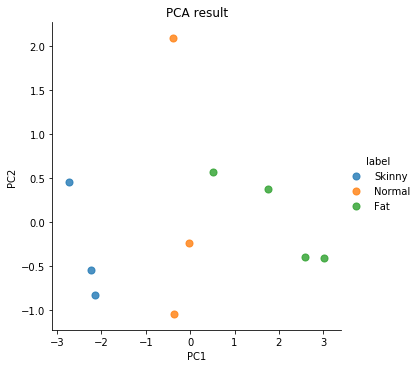

In [34]:
# 시각화~~
sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['PC1', 'PC2'])
sklearn_result['label'] = Y

sns.lmplot('PC1', 'PC2',  data = sklearn_result, fit_reg = False, 
          scatter_kws = {"s":50},
          hue = "label")
plt.title('PCA result')

# 2 특이값 분해(SVD, Singular Value Decomposion)

![대체 텍스트](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ab6bd797a2b7652b0a54894bb3825756e8f9c6c)

In [35]:
A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])

## 2.1 특이값 분해

![대체 텍스트](https://wikimedia.org/api/rest_v1/media/math/render/svg/8d164e57dfbf6318e5cdc21a1c24fcc6c3cea0c4)

In [37]:
import numpy as np

U, s, VT = np.linalg.svd(A)

In [39]:
print('U : \n {}'.format(U))
print('U : \n {}'.format(s))
print('U : \n {}'.format(VT))

U : 
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
U : 
 [3.         2.23606798 2.         0.        ]
U : 
 [[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


## 2.2 이미지에 적용한 특이값 분해

In [40]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = '/content/drive/My Drive/강의 /Great-Ocean-Road.jpg'

#이미지 파일 열기
img = Image.open(path)

#파일 크기 계산
s = float(os.path.getsize(path))/1000
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

# gray 스케일로 변환
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)

# 이미지 크기(가로, 세로)로 reshape
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition

# 5, 25, 45 개의 특이값을 적용하여 이미지 압축
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/강의 /Great-Ocean-Road.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 이걸 하면 실제로 자신의 드라이브가 연결된다.. colab에서..
# 그러니 코랩으로 돌리기 ..!